> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [14]:
#import useful packages
 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
%matplotlib inline

In [15]:
df = pd.read_csv('no_show appointments.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [16]:
df.shape
#df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [17]:
df.drop(['PatientId', 'ScheduledDay','AppointmentDay'], axis = 1, inplace = True)
df.head()


,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
b = df['AppointmentID'].nunique()
print(b)

110527


In [19]:
df.rename(columns= lambda x: x.lower(), inplace = True)
df.head()


,appointmentid,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
df.rename(columns={"appointmentid": "appointment_id", 
                         "no-show": "no_show"}, inplace = True)

In [21]:
df['no_show'].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head(5)

,appointment_id,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [22]:
df['handcap_new'] = (df['handcap']>=1).astype(int)
df.drop('handcap', axis = 1, inplace = True)

In [23]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
appointment_id    110527 non-null int64
gender            110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null int64
handcap_new       110527 non-null int64
dtypes: int64(9), object(2)
memory usage: 9.3+ MB


Text(0.5,1,'5 Highest neighbourhood with no show appointment')

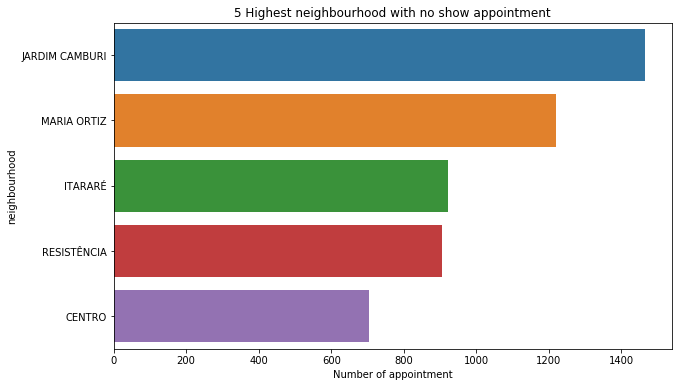

In [24]:
no_show_values = df[df['no_show'] == 1]
top_values = no_show_values['neighbourhood'].value_counts().index[:5]
plt.figure(figsize=(10,6))
sns.countplot(data = no_show_values, y = 'neighbourhood', order = top_values)
plt.xlabel('Number of appointment')
plt.ylabel('neighbourhood')
plt.title('5 Highest neighbourhood with no show appointment')


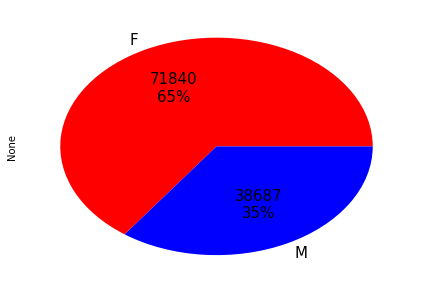

In [25]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(7, 5))

df.groupby('gender').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 15},
                                  colors=['r', 'b'], ax=ax1)

plt.show()

In [30]:
plt.figure(figsize=(14, 4))
sns.histplot(data=df, x='age', hue='no_show', bins=70, kde=True);
plt.title("AGE EFFECT ON THE appointment",fontsize=18)
plt.ylabel("Count",fontsize=14)
plt.show();
print(describe)

AttributeError: module 'seaborn' has no attribute 'histplot'

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


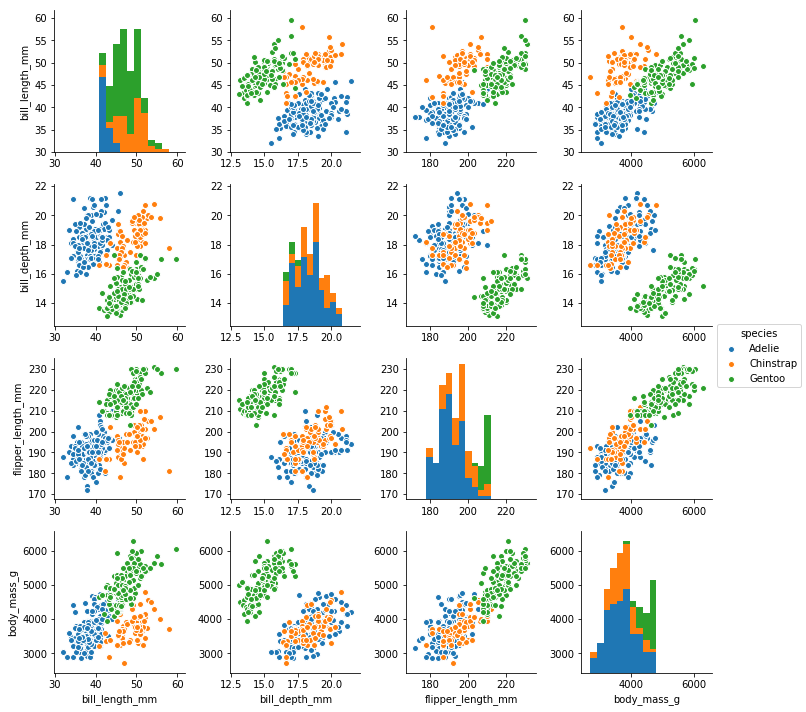

In [31]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")


In [32]:
sns.__version__

'0.8.1'

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])